<a href="https://colab.research.google.com/github/MFRoz1/IntelligoCompetition/blob/main/Full_2_(RFE_fitur_selection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [4]:
df_Customers = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/train/df_Customers.csv')
df_Orderitems = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/train/df_OrderItems.csv')
df_Orders = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/train/df_Orders.csv')
df_Payments = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/train/df_Payments.csv')
df_Products = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/train/df_Products.csv')


Yang jadi acuan utama order id

In [5]:
df_Customers

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,hCT0x9JiGXBQ,58125,varzea paulista,SP
1,PxA7fv9spyhx,3112,armacao dos buzios,RJ
2,g3nXeJkGI0Qw,4119,jandira,SP
3,EOEsCQ6QlpIg,18212,uberlandia,MG
4,mVz5LO2Vd6cL,88868,ilhabela,SP
...,...,...,...,...
89311,bfJtzkBGksdY,94060,amparo,SP
89312,4hjsCpj6FC7g,99835,itapevi,SP
89313,DLn56oKHl9bv,2540,sao paulo,SP
89314,auSfRYUQUOIq,12288,paulinia,SP


In [6]:
df_Orderitems

,order_id,product_id,seller_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38
3,bwJVWupf2keN,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72
4,Dd0QnrMk9Cj5,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66
...,...,...,...,...,...
89311,zlcLnXGgAabl,W8vikEizUggJ,2QjevWskirjm,31.99,188.65
89312,IlTAoIkILwrq,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64
89313,uA6oXfftGVmT,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09
89314,v3QtU6xlGDJp,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01


In [7]:
df_Orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18
...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17


In [8]:
df_Payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,Axfy13Hk4PIk,1,credit_card,1,259.14
1,v6px92oS8cLG,1,credit_card,8,382.39
2,Ulpf9skrhjfm,1,credit_card,4,249.25
3,bwJVWupf2keN,1,credit_card,2,27.79
4,Dd0QnrMk9Cj5,1,credit_card,1,76.15
...,...,...,...,...,...
89311,zlcLnXGgAabl,1,wallet,1,128.00
89312,IlTAoIkILwrq,1,wallet,1,106.86
89313,uA6oXfftGVmT,1,credit_card,1,376.39
89314,v3QtU6xlGDJp,1,voucher,1,48.05


In [9]:
df_Products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...
89311,W8vikEizUggJ,toys,700.0,21.0,14.0,14.0
89312,KXSbyJWtMMwZ,toys,600.0,16.0,16.0,16.0
89313,EG4wDSpFyTth,health_beauty,250.0,22.0,10.0,18.0
89314,ZWyg4uNWPHjJ,toys,250.0,16.0,2.0,11.0


In [10]:
train_label = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/data_labelling.csv')
train_label

,shipping_charges,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,is_late
0,84.65,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,22/10/2017 18:57,22/10/2017 19:14,2017-10-26 22:19:00,2017-09-11,1
1,23.79,v6px92oS8cLG,PxA7fv9spyhx,delivered,20/06/2018 21:40,20/06/2018 22:20,2018-03-07 22:51:00,2018-07-24,0
2,17.38,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,16/02/2018 16:19,17/02/2018 16:15,2018-02-27 01:29:00,2018-08-03,0
3,30.72,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,18/08/2018 18:04,18/08/2018 18:15,2018-08-27 20:03:00,2018-09-19,0
4,30.66,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,22/12/2017 16:44,22/12/2017 17:31,2018-05-01 19:22:00,2018-01-18,1
...,...,...,...,...,...,...,...,...,...
87413,188.65,zlcLnXGgAabl,bfJtzkBGksdY,delivered,19/08/2018 17:25,21/08/2018 04:35,2018-08-30 14:47:00,2018-04-09,1
87414,1.64,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,15/12/2017 11:20,16/12/2017 02:37,2017-12-20 19:23:00,2018-04-01,0
87415,4.09,uA6oXfftGVmT,DLn56oKHl9bv,delivered,24/07/2018 06:39,24/07/2018 11:20,2018-07-27 01:41:00,2018-01-08,1
87416,113.01,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,11/08/2018 08:04,11/08/2018 08:24,2018-08-14 21:43:00,2018-08-17,0


# Ekstraksi Fitur

## Selection fitur berdasarkan data test

In [11]:
#'order_delivered_timestamp', 'order_estimated_delivery_date'

In [12]:
df_Orders = df_Orders.drop(columns = ['order_status'], axis = 1)

## Drop kolom id

In [13]:
df_Customers = df_Customers.drop(columns = ['customer_id'], axis = 1)
df_Orderitems = df_Orderitems.drop(columns = ['order_id', 'product_id', 'seller_id'], axis = 1)
df_Orders = df_Orders.drop(columns = ['order_id', 'customer_id'], axis = 1)
df_Payments = df_Payments.drop(columns = ['order_id'], axis = 1)
df_Products = df_Products.drop(columns = ['product_id'], axis = 1)

## Mergering data

In [14]:
data_new = pd.concat([df_Customers, df_Orderitems, df_Orders, df_Payments, df_Products], axis=1)
data_new

,customer_zip_code_prefix,customer_city,customer_state,price,shipping_charges,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,58125,varzea paulista,SP,223.51,84.65,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
1,3112,armacao dos buzios,RJ,170.80,23.79,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0
2,4119,jandira,SP,64.40,17.38,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,18212,uberlandia,MG,264.50,30.72,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0
4,88868,ilhabela,SP,779.90,30.66,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,94060,amparo,SP,31.99,188.65,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,1,wallet,1,128.00,toys,700.0,21.0,14.0,14.0
89312,99835,itapevi,SP,282.00,1.64,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,1,wallet,1,106.86,toys,600.0,16.0,16.0,16.0
89313,2540,sao paulo,SP,58.10,4.09,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,1,credit_card,1,376.39,health_beauty,250.0,22.0,10.0,18.0
89314,12288,paulinia,SP,2899.00,113.01,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,1,voucher,1,48.05,toys,250.0,16.0,2.0,11.0


## Handling Missing Values

In [15]:
data_new.isna().sum()

customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
price                               0
shipping_charges                    0
order_purchase_timestamp            0
order_approved_at                   9
order_delivered_timestamp        1889
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name             308
product_weight_g                   15
product_length_cm                  15
product_height_cm                  15
product_width_cm                   15
dtype: int64

In [16]:
data_new = data_new.drop(columns = ['product_category_name'], axis = 1)

In [17]:
data_new[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']] = data_new[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].fillna(data_new[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].mean())

In [18]:
data_new = data_new.dropna()
data_new

,customer_zip_code_prefix,customer_city,customer_state,price,shipping_charges,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,58125,varzea paulista,SP,223.51,84.65,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,491.0,19.0,12.0,16.0
1,3112,armacao dos buzios,RJ,170.80,23.79,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,1,credit_card,8,382.39,440.0,18.0,14.0,17.0
2,4119,jandira,SP,64.40,17.38,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,1,credit_card,4,249.25,2200.0,16.0,16.0,16.0
3,18212,uberlandia,MG,264.50,30.72,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,1,credit_card,2,27.79,1450.0,68.0,3.0,48.0
4,88868,ilhabela,SP,779.90,30.66,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,1,credit_card,1,76.15,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,94060,amparo,SP,31.99,188.65,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,1,wallet,1,128.00,700.0,21.0,14.0,14.0
89312,99835,itapevi,SP,282.00,1.64,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,1,wallet,1,106.86,600.0,16.0,16.0,16.0
89313,2540,sao paulo,SP,58.10,4.09,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,1,credit_card,1,376.39,250.0,22.0,10.0,18.0
89314,12288,paulinia,SP,2899.00,113.01,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,1,voucher,1,48.05,250.0,16.0,2.0,11.0


In [19]:
data_new_late = data_new.reset_index(drop = True)

In [20]:
data_new_late= data_new_late.join(train_label['is_late'])
data_new_late

,customer_zip_code_prefix,customer_city,customer_state,price,shipping_charges,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late
0,58125,varzea paulista,SP,223.51,84.65,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,1,credit_card,1,259.14,491.0,19.0,12.0,16.0,1
1,3112,armacao dos buzios,RJ,170.80,23.79,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,1,credit_card,8,382.39,440.0,18.0,14.0,17.0,0
2,4119,jandira,SP,64.40,17.38,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,1,credit_card,4,249.25,2200.0,16.0,16.0,16.0,0
3,18212,uberlandia,MG,264.50,30.72,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,1,credit_card,2,27.79,1450.0,68.0,3.0,48.0,0
4,88868,ilhabela,SP,779.90,30.66,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,1,credit_card,1,76.15,300.0,17.0,4.0,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87413,94060,amparo,SP,31.99,188.65,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,1,wallet,1,128.00,700.0,21.0,14.0,14.0,1
87414,99835,itapevi,SP,282.00,1.64,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,1,wallet,1,106.86,600.0,16.0,16.0,16.0,0
87415,2540,sao paulo,SP,58.10,4.09,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,1,credit_card,1,376.39,250.0,22.0,10.0,18.0,1
87416,12288,paulinia,SP,2899.00,113.01,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,1,voucher,1,48.05,250.0,16.0,2.0,11.0,0


In [21]:
data_new_late.isna().sum()

customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
price                            0
shipping_charges                 0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
is_late                          0
dtype: int64

In [22]:
data_new_late = data_new_late.drop(columns = ['customer_city', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_timestamp'], axis = 1)

In [23]:
data_new.isna().sum()

customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
price                            0
shipping_charges                 0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [24]:
data_new_late

,customer_zip_code_prefix,customer_state,price,shipping_charges,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late
0,58125,SP,223.51,84.65,2017-11-09,1,credit_card,1,259.14,491.0,19.0,12.0,16.0,1
1,3112,RJ,170.80,23.79,2018-07-24,1,credit_card,8,382.39,440.0,18.0,14.0,17.0,0
2,4119,SP,64.40,17.38,2018-03-08,1,credit_card,4,249.25,2200.0,16.0,16.0,16.0,0
3,18212,MG,264.50,30.72,2018-09-19,1,credit_card,2,27.79,1450.0,68.0,3.0,48.0,0
4,88868,SP,779.90,30.66,2018-01-18,1,credit_card,1,76.15,300.0,17.0,4.0,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87413,94060,SP,31.99,188.65,2018-09-04,1,wallet,1,128.00,700.0,21.0,14.0,14.0,1
87414,99835,SP,282.00,1.64,2018-01-04,1,wallet,1,106.86,600.0,16.0,16.0,16.0,0
87415,2540,SP,58.10,4.09,2018-08-01,1,credit_card,1,376.39,250.0,22.0,10.0,18.0,1
87416,12288,SP,2899.00,113.01,2018-08-17,1,voucher,1,48.05,250.0,16.0,2.0,11.0,0


## Encoding

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
#Mendefinisikan nilai unique dari masing masing kolom yang akan di encodimg
col = sorted(data_new_late['customer_state'].unique().tolist()) + sorted(data_new_late['payment_type'].unique().tolist())
print(col)

['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'credit_card', 'debit_card', 'voucher', 'wallet']


In [27]:
# Mengubah kolom menggunakan OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')
encod = pd.DataFrame(ohe.fit_transform(data_new[['customer_state', 'payment_type']]).toarray(), columns = col)
encod

,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,RR,RS,SC,SE,SP,TO,credit_card,debit_card,voucher,wallet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
87414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
87415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
87416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [28]:
data_final = data_new_late.reset_index(drop = True)

In [29]:
data_final = data_final.join(encod)

In [30]:
data_final = data_final.drop(columns = ['payment_type', 'customer_state', 'order_estimated_delivery_date'], axis = 1)
data_final

,customer_zip_code_prefix,price,shipping_charges,payment_sequential,payment_installments,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,RR,RS,SC,SE,SP,TO,credit_card,debit_card,voucher,wallet
0,58125,223.51,84.65,1,1,259.14,491.0,19.0,12.0,16.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,3112,170.80,23.79,1,8,382.39,440.0,18.0,14.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4119,64.40,17.38,1,4,249.25,2200.0,16.0,16.0,16.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,18212,264.50,30.72,1,2,27.79,1450.0,68.0,3.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,88868,779.90,30.66,1,1,76.15,300.0,17.0,4.0,12.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87413,94060,31.99,188.65,1,1,128.00,700.0,21.0,14.0,14.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
87414,99835,282.00,1.64,1,1,106.86,600.0,16.0,16.0,16.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
87415,2540,58.10,4.09,1,1,376.39,250.0,22.0,10.0,18.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
87416,12288,2899.00,113.01,1,1,48.05,250.0,16.0,2.0,11.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [31]:
data_final.isna().sum()

customer_zip_code_prefix    0
price                       0
shipping_charges            0
payment_sequential          0
payment_installments        0
payment_value               0
product_weight_g            0
product_length_cm           0
product_height_cm           0
product_width_cm            0
is_late                     0
AC                          0
AL                          0
AM                          0
AP                          0
BA                          0
CE                          0
DF                          0
ES                          0
GO                          0
MA                          0
MG                          0
MS                          0
MT                          0
PA                          0
PB                          0
PE                          0
PI                          0
PR                          0
RJ                          0
RN                          0
RO                          0
RR                          0
RS        

## RFE

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # Contoh model, sesuaikan dengan model yang sesuai

# Memisahkan atribut (fitur) dan label (target)
X = data_final.drop('is_late', axis=1)  # Atribut
y = data_final['is_late']  # Label

# Membuat model yang akan digunakan untuk seleksi fitur (misalnya, regresi logistik)
model = LogisticRegression()  # Ganti dengan model yang sesuai

# Membuat objek RFE dengan model yang telah dipilih
n_features_to_select = 27  # Ganti dengan jumlah fitur yang ingin Anda pertahankan
rfe = RFE(model, n_features_to_select = 27)

# Melakukan seleksi fitur
X_rfe = rfe.fit_transform(X, y)

# Menampilkan indeks fitur yang terpilih
selected_features = X.columns[rfe.support_]
print("Fitur Terpilih:", selected_features.tolist())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fitur Terpilih: ['payment_sequential', 'payment_installments', 'product_length_cm', 'product_width_cm', 'AL', 'AM', 'AP', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MT', 'PA', 'PB', 'PE', 'PR', 'RN', 'RS', 'SC', 'SP', 'TO', 'credit_card', 'debit_card', 'voucher', 'wallet']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
data_final_new = data_final[['payment_sequential', 'payment_installments', 'product_length_cm', 'product_width_cm', 'AL', 'AM', 'AP', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MT', 'PA', 'PB', 'PE', 'PR', 'RN', 'RS', 'SC', 'SP', 'TO', 'credit_card', 'debit_card', 'voucher', 'wallet','is_late']]
data_final_new

,payment_sequential,payment_installments,product_length_cm,product_width_cm,AL,AM,AP,CE,DF,ES,...,RN,RS,SC,SP,TO,credit_card,debit_card,voucher,wallet,is_late
0,1,1,19.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
1,1,8,18.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1,4,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
3,1,2,68.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,1,1,17.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87413,1,1,21.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
87414,1,1,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
87415,1,1,22.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
87416,1,1,16.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


#Define Data Testing

In [34]:
test_Customers = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/test/df_Customers.csv')
test_Orderitems = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/test/df_OrderItems.csv')
test_Products = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/test/df_Products.csv')
test_Orders = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/test/df_Orders.csv')
test_Payments = pd.read_csv('/content/drive/MyDrive/DA & DS/Data dan hasil analisis lomba/INTELLIGO/fix-tahap-1-lomba-data-science-intelligo-id/test/df_Payments.csv')

In [35]:
test_Customers

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,I74lXDOfoqsp,6020,goiania,GO
1,47TuLHF2s7X5,23020,viamao,RS
2,dQ0dqI8Qwlj8,75094,campinas,SP
3,iQCmWhNkIczb,89284,santana de parnaiba,SP
4,Dp2g6JH8tO5Z,39810,aripuana,MT
...,...,...,...,...
38274,Dw3aCTFf4Q4G,26160,guarulhos,SP
38275,JmHJqJvpVcJs,39628,rio de janeiro,RJ
38276,ro5DikwWCC3j,89284,santana de parnaiba,SP
38277,R25nE2rl77AU,60867,sao paulo,SP


In [36]:
test_Orderitems

,order_id,product_id,seller_id,price,shipping_charges
0,u6rPMRAYIGig,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90
1,ohY8f4FEbX19,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28
2,I28liQek73i2,QVlD26X1y7NI,V3iKL8r9W9NR,50.21,67.11
3,bBG1T89mlY8W,yWlFGkKYfrpa,RNBdBKsXebna,89.10,62.05
4,CYxJJSQS8Lbo,h6MCbrwh5kiC,5Ja2lH0N2OZt,2139.99,9.41
...,...,...,...,...,...
38274,QKBW3XKevmfn,wr6barwyoaIE,XURInBuULfIO,99.25,37.66
38275,Tjiw9bj8HtLr,sPZVXBD9lf3e,wR4cqCClYDyY,86.32,40.98
38276,mCPofb7A1aTq,Th6SHMsyTOMH,Gp2lLacVPwug,104.45,30.24
38277,scVuqN10zbgb,PyjlDSHRGdSt,al4fWZ5NFQzG,223.87,74.75


In [37]:
test_Products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1slxdgbgWFax,toys,50.0,16.0,5.0,11.0
1,77PgsiElQLeB,electronics,200.0,21.0,7.0,14.0
2,QVlD26X1y7NI,furniture_decor,1000.0,100.0,5.0,20.0
3,yWlFGkKYfrpa,toys,8950.0,40.0,30.0,40.0
4,h6MCbrwh5kiC,toys,2301.0,32.0,35.0,34.0
...,...,...,...,...,...,...
38274,wr6barwyoaIE,toys,200.0,16.0,28.0,11.0
38275,sPZVXBD9lf3e,toys,5150.0,22.0,3.0,22.0
38276,Th6SHMsyTOMH,toys,430.0,21.0,11.0,17.0
38277,PyjlDSHRGdSt,toys,1850.0,24.0,36.0,23.0


In [38]:
test_Orders

,order_id,customer_id,order_purchase_timestamp,order_approved_at
0,u6rPMRAYIGig,I74lXDOfoqsp,2017-11-18 12:29:57,2017-11-18 12:46:08
1,ohY8f4FEbX19,47TuLHF2s7X5,2018-06-02 17:13:12,2018-06-02 20:12:23
2,I28liQek73i2,dQ0dqI8Qwlj8,2018-01-08 11:01:30,2018-01-09 07:24:03
3,bBG1T89mlY8W,iQCmWhNkIczb,2017-03-10 10:24:46,2017-03-10 10:24:46
4,CYxJJSQS8Lbo,Dp2g6JH8tO5Z,2017-12-02 10:04:07,2017-12-05 04:13:30
...,...,...,...,...
38274,QKBW3XKevmfn,Dw3aCTFf4Q4G,2018-08-24 11:54:56,2018-08-24 12:05:22
38275,Tjiw9bj8HtLr,JmHJqJvpVcJs,2017-03-25 20:39:11,2017-03-25 20:50:17
38276,mCPofb7A1aTq,ro5DikwWCC3j,2018-08-16 13:39:30,2018-08-17 03:31:06
38277,scVuqN10zbgb,R25nE2rl77AU,2018-06-27 13:17:05,2018-06-28 08:50:58


In [39]:
test_Payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,u6rPMRAYIGig,1,credit_card,2,155.77
1,ohY8f4FEbX19,1,credit_card,1,4.07
2,I28liQek73i2,1,wallet,1,381.59
3,bBG1T89mlY8W,1,credit_card,3,14.76
4,CYxJJSQS8Lbo,1,wallet,1,284.09
...,...,...,...,...,...
38274,QKBW3XKevmfn,1,credit_card,1,209.51
38275,Tjiw9bj8HtLr,1,credit_card,2,323.31
38276,mCPofb7A1aTq,1,wallet,1,170.71
38277,scVuqN10zbgb,1,credit_card,10,100.65


In [40]:
data_test = test_Payments[['payment_sequential', 'payment_type', 'payment_installments']].join(test_Products[['product_width_cm', 'product_length_cm']]).join(test_Customers['customer_state'])

In [41]:
data_test

,payment_sequential,payment_type,payment_installments,product_width_cm,product_length_cm,customer_state
0,1,credit_card,2,11.0,16.0,GO
1,1,credit_card,1,14.0,21.0,RS
2,1,wallet,1,20.0,100.0,SP
3,1,credit_card,3,40.0,40.0,SP
4,1,wallet,1,34.0,32.0,MT
...,...,...,...,...,...,...
38274,1,credit_card,1,11.0,16.0,SP
38275,1,credit_card,2,22.0,22.0,RJ
38276,1,wallet,1,17.0,21.0,SP
38277,1,credit_card,10,23.0,24.0,SP


## Encoding [test]

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
#Mendefinisikan nilai unique dari masing masing kolom yang akan di encodimg
col_test = sorted(data_test['customer_state'].unique().tolist()) + sorted(data_test['payment_type'].unique().tolist())
print(col_test)

['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'credit_card', 'debit_card', 'voucher', 'wallet']


In [44]:
# Mengubah kolom menggunakan OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')
encod_test = pd.DataFrame(ohe.fit_transform(data_test[['customer_state', 'payment_type']]).toarray(), columns = col_test)
encod_test

,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,RR,RS,SC,SE,SP,TO,credit_card,debit_card,voucher,wallet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
38275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
38277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [45]:
data_final_test = data_test.join(encod)

In [46]:
data_final_test = data_final_test[['payment_sequential', 'payment_installments', 'product_length_cm', 'product_width_cm', 'AL', 'AM', 'AP', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MT', 'PA', 'PB', 'PE', 'PR', 'RN', 'RS', 'SC', 'SP', 'TO', 'credit_card', 'debit_card', 'voucher', 'wallet']]
data_final_test

,payment_sequential,payment_installments,product_length_cm,product_width_cm,AL,AM,AP,CE,DF,ES,...,PR,RN,RS,SC,SP,TO,credit_card,debit_card,voucher,wallet
0,1,2,16.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,1,21.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,1,100.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,3,40.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,1,32.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,1,1,16.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38275,1,2,22.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38276,1,1,21.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38277,1,10,24.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
data_final_test.isna().sum()

payment_sequential       0
payment_installments     0
product_length_cm       10
product_width_cm        10
AL                       0
AM                       0
AP                       0
CE                       0
DF                       0
ES                       0
GO                       0
MA                       0
MG                       0
MT                       0
PA                       0
PB                       0
PE                       0
PR                       0
RN                       0
RS                       0
SC                       0
SP                       0
TO                       0
credit_card              0
debit_card               0
voucher                  0
wallet                   0
dtype: int64

## Handling Missing Values [test]

In [48]:
data_final_test[['product_length_cm',  'product_width_cm']] = data_final_test[['product_length_cm', 'product_width_cm']].fillna(data_final_test[['product_length_cm', 'product_width_cm']].mean())

In [49]:
data_final_test.isna().sum()

payment_sequential      0
payment_installments    0
product_length_cm       0
product_width_cm        0
AL                      0
AM                      0
AP                      0
CE                      0
DF                      0
ES                      0
GO                      0
MA                      0
MG                      0
MT                      0
PA                      0
PB                      0
PE                      0
PR                      0
RN                      0
RS                      0
SC                      0
SP                      0
TO                      0
credit_card             0
debit_card              0
voucher                 0
wallet                  0
dtype: int64

In [50]:
# Melakukan pengecekan korelasi antar variabel menggunakan PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

data_testfinal_pca = pca.fit_transform(data_final_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.78186389, 0.19534286])

In [51]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
kmeans.fit(data_testfinal_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [52]:
from sklearn.cluster import KMeans
pred_test = kmeans.predict(data_testfinal_pca)
print(pred_test)

[0 0 1 ... 0 0 0]


In [53]:
data_final_test['is_late'] = pred_test

In [54]:
data_final_test

,payment_sequential,payment_installments,product_length_cm,product_width_cm,AL,AM,AP,CE,DF,ES,...,RN,RS,SC,SP,TO,credit_card,debit_card,voucher,wallet,is_late
0,1,2,16.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
1,1,1,21.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1,1,100.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,1,3,40.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,1,1,32.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,1,1,16.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
38275,1,2,22.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
38276,1,1,21.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
38277,1,10,24.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [55]:
data_final_test.to_csv('Submission 3 KMeans.csv', index = False)

In [56]:
centroids = kmeans.cluster_centers_

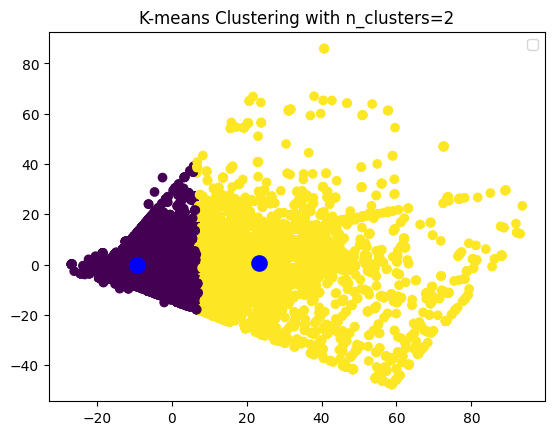

In [57]:
# Visualize the results
plt.scatter(data_testfinal_pca[:, 0], data_testfinal_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=100, linewidths=2, color='b')
plt.title('K-means Clustering with n_clusters=2')
plt.legend()
plt.show()

#Optimizing with Classification


In [72]:
data_clas = data_final_test.drop(columns = ['is_late'], axis = 1)

In [59]:
X_test = data_final_test.drop(columns = ['is_late'], axis = 1)
y_test = data_final_test['is_late']

In [60]:
X_train = data_final_new.drop(columns = ['is_late'], axis = 1)
y_train = data_final_new['is_late']

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Membuat objek Logistic Regression
model = LogisticRegression()

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred_LR = model.predict(X_test)

# Mengukur akurasi
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print("Akurasi Logistic Regression:", accuracy_LR)


Akurasi Logistic Regression: 0.7136550066616161


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Membuat objek Decision Tree
model = DecisionTreeClassifier()

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred_DTC = model.predict(X_test)

# Mengukur akurasi
accuracy_DTC = accuracy_score(y_test, y_pred_DTC)
print("Akurasi Decision Trees:", accuracy_DTC)


Akurasi Decision Trees: 0.6714125238381358


In [63]:
#from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score

# Membuat objek SVM
#model = SVC()

# Melatih model
#model.fit(X_train, y_train)

# Melakukan prediksi
#y_pred_SVM = model.predict(X_test)

# Mengukur akurasi
#accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
#print("Akurasi SVM:", accuracy_SVM)


In [64]:
#from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score

# Membuat objek SVM
#model = SVC(C = 100.0)

# Melatih model
#model.fit(X_train, y_train)

# Melakukan prediksi
#y_pred_SVMrbf = model.predict(X_test)

# Mengukur akurasi
#accuracy_SVMrbf = accuracy_score(y_test, y_pred_SVMrbf)
#print("Akurasi SVM:", accuracy_SVMrbf)

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier()
gbr.fit(X_train, y_train)

# Prediksi nilai y
y_pred_gbr = gbr.predict(X_test)
accuracy_GBR = accuracy_score(y_test, y_pred_gbr)
print("Akurasi GBR:", accuracy_GBR)

Akurasi GBR: 0.7143603542412289


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Membuat model Random Forest
rfc = RandomForestClassifier()

# Melatih model pada data latih
rfc.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_RFC = rfc.predict(X_test)

# Mengukur akurasi model
accuracy_RFC = accuracy_score(y_test, y_pred_RFC)
print("Akurasi Model Random Forest:", accuracy_RFC)


Akurasi Model Random Forest: 0.6609368060816636


# Deep Learning

In [71]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Membangun model neural network menggunakan TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(27,)),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Melakukan prediksi pada data uji
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

# Mengukur akurasi model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Akurasi Model Neural Network:", accuracy_nn)


Epoch 1/10
2186/2186 [==============================] - 111s 50ms/step - loss: 0.6693 - accuracy: 0.6441 - val_loss: 0.6453 - val_accuracy: 0.6531
Epoch 2/10
2186/2186 [==============================] - 104s 48ms/step - loss: 0.6478 - accuracy: 0.6500 - val_loss: 0.6452 - val_accuracy: 0.6531
Epoch 3/10
2186/2186 [==============================] - 108s 49ms/step - loss: 0.6474 - accuracy: 0.6500 - val_loss: 0.6450 - val_accuracy: 0.6531
Epoch 4/10
2186/2186 [==============================] - 109s 50ms/step - loss: 0.6475 - accuracy: 0.6500 - val_loss: 0.6450 - val_accuracy: 0.6531
Epoch 5/10
2186/2186 [==============================] - 107s 49ms/step - loss: 0.6475 - accuracy: 0.6501 - val_loss: 0.6455 - val_accuracy: 0.6531
Epoch 6/10
2186/2186 [==============================] - 111s 51ms/step - loss: 0.6475 - accuracy: 0.6500 - val_loss: 0.6453 - val_accuracy: 0.6531
Epoch 7/10
2186/2186 [==============================] - 112s 51ms/step - loss: 0.6474 - accuracy: 0.6501 - val_loss: 0

In [73]:
data_clas['is_late'] = y_pred_nn

In [74]:
data_clas

,payment_sequential,payment_installments,product_length_cm,product_width_cm,AL,AM,AP,CE,DF,ES,...,RN,RS,SC,SP,TO,credit_card,debit_card,voucher,wallet,is_late
0,1,2,16.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
1,1,1,21.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1,1,100.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
3,1,3,40.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,1,1,32.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,1,1,16.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
38275,1,2,22.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
38276,1,1,21.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
38277,1,10,24.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [75]:
data_clas.to_csv('Submission 4.csv', index = False)